<a href="https://colab.research.google.com/github/vaishjah3/Assignments/blob/main/Classify_handwritten_digits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.autograd as Variable
import cv2
from PIL import Image
import numpy as np

In [ ]:
mean_gray=0.1307
stddev_gray=0.3087

transforms= transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((mean_gray,), (stddev_gray,))])

In [ ]:
train_dataset=datasets.MNIST(root='./data',
                             train=True,
                             download=True,
                             transform=transforms)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 138480459.00it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 41613086.16it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 73063423.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3395210.97it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
test_dataset=datasets.MNIST (root='./data',
                             train=False,
                             download=True,
                             transform=transforms)

In [ ]:
import matplotlib.pyplot as plt

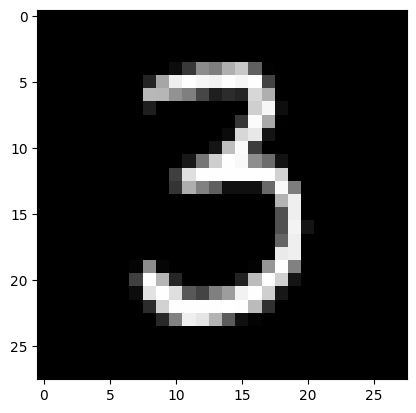

In [ ]:
image=train_dataset[50][0].numpy()*stddev_gray+mean_gray
plt.imshow(image.reshape(28,28),cmap='gray')

In [ ]:
print(train_dataset[50][1])

3


In [ ]:
batch_size=100
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                    batch_size=batch_size,
                                    shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                   batch_size=batch_size,
                                   shuffle=False
                                  )

In [ ]:
print('There are {} images in the training set'.format(len(train_dataset)))
print('There are {} images in the test set'.format(len(test_dataset)))
print('There are {} batches in the train loader'.format(len(train_loader)))
print('There are {} batches in the testloader'.format(len(test_loader)))

There are 60000 images in the training set
There are 10000 images in the test set
There are 600 batches in the train loader
There are 100 batches in the testloader


In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.cnn1=nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1, stride=1)
    self.batchnorm1=nn.BatchNorm2d(8)
    self.relu=nn.ReLU()
    self.maxpool=nn.MaxPool2d(kernel_size=2)
    self.cnn2=nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, padding=2, stride=1)
    self.batchnorm2=nn.BatchNorm2d(32)
    self.fc1=nn.Linear(in_features=1568, out_features=600)
    self.dropout=nn.Dropout(p=0.5)
    self.fc2=nn.Linear(in_features=600, out_features=10)

  def forward(self,x):
    out=self.cnn1(x)
    out=self.batchnorm1(out)
    out=self.relu(out)
    out=self.maxpool(out)
    out=self.cnn2(out)
    out=self.batchnorm2(out)
    out=self.relu(out)
    out=self.maxpool(out)
    out=out.view(-1, 1568)
    out=self.fc1(out)
    out=self.relu(out)
    out=self.dropout(out)
    out=self.fc2(out)
    return out




In [ ]:
torch.cuda.is_available()

False

In [ ]:
model=CNN()
CUDA=torch.cuda.is_available()
if CUDA:
  model=model.cuda()
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
iteration = 0
correct = 0

for i,(inputs,labels) in enumerate (train_loader):

    if CUDA:
        inputs = inputs.cuda()
        labels = labels.cuda()

    print("For one iteration, this is what happens:")
    #Input= (batch_zize, channels, row_length, col_length)
    print("Input Shape:",inputs.shape)
    print("Labels Shape:",labels.shape)
    output = model(inputs)
    print("Outputs Shape",output.shape)
    _, predicted = torch.max(output, 1)
    print("Predicted Shape",predicted.shape)
    print("Predicted Tensor:")
    print(predicted)
    correct += (predicted == labels).sum()
    break

For one iteration, this is what happens:
Input Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])
Outputs Shape torch.Size([100, 10])
Predicted Shape torch.Size([100])
Predicted Tensor:
tensor([0, 1, 0, 0, 8, 0, 2, 8, 6, 6, 7, 6, 6, 7, 0, 5, 7, 0, 7, 0, 0, 2, 7, 6,
        6, 9, 0, 7, 7, 0, 7, 0, 0, 1, 0, 2, 2, 7, 0, 8, 2, 7, 0, 0, 7, 7, 7, 2,
        7, 7, 7, 7, 0, 0, 2, 0, 0, 2, 0, 2, 7, 7, 7, 7, 7, 7, 9, 0, 0, 0, 7, 8,
        8, 7, 2, 7, 7, 7, 2, 8, 7, 7, 7, 9, 5, 0, 6, 6, 5, 0, 7, 2, 0, 7, 6, 2,
        7, 7, 7, 6])


model(inputs) will transfer the inputs to forward function automatically

In [ ]:
num_epochs=10
#define list to store loss and accuracy of all epochs
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]
for epoch in range(num_epochs):
  #reset these variable for every epochs
  correct=0
  iteration=0
  iter_loss=0.0
  #since batchnorm and dropout act different in training and testing, hence we set the model to train to activate these.
  #Batch normalization is not used during testing. The reason for that being is batch normalization is used to alleviate the problem of covariance shift between different batches in training data. The covariance shift leads to bad models getting trained, thus, we use it. It has no role to play during testing.
  model.train()

  for i, (inputs,labels) in enumerate(train_loader):
    if CUDA:
      inputs=inputs.cuda()
      labels=labels.cuda()

    outputs=model(inputs)
    loss=loss_fn(outputs, labels)
    iter_loss+=loss.item()
    optimizer.zero_grad()  #remove accumulated gradients, new gradients for each iteration
    loss.backward()   #backpropagation
    optimizer.step()  #update_weights


    #predicted out for one iteration
    _, predicted=torch.max(output,1)
    correct+=(predicted==labels).sum()
    iteration+=1

  train_loss.append(iter_loss/iteration)
  train_accuracy.append(correct/len(train_dataset)*100)

  testing_loss=0.0
  correct=0
  iterations=0

  model.eval()

  for i, (inputs, labels) in enumerate(test_loader):
    if CUDA:
      inputs=input.cuda()
      labels=labels.cuda()

    outputs=model(inputs)
    loss=loss_fn(outputs, labels)
    testing_loss+=loss.item()

    _, predicted=torch.max(output,1)
    correct+=(predicted==labels).sum()
    iteration+=1

    test_loss.append(testing_loss/iteration)
    test_accuracy.append((correct/len(test_dataset))*100)


  print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}'
      .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1],
        test_loss[-1], test_accuracy[-1]))


Epoch 2/10, Training Loss: 0.050, Training Accuracy: 10.213, Testing Loss: 0.006, Testing Acc: 10.390
Epoch 3/10, Training Loss: 0.051, Training Accuracy: 10.010, Testing Loss: 0.005, Testing Acc: 10.390
Epoch 4/10, Training Loss: 0.048, Training Accuracy: 9.992, Testing Loss: 0.006, Testing Acc: 10.390


KeyboardInterrupt: 

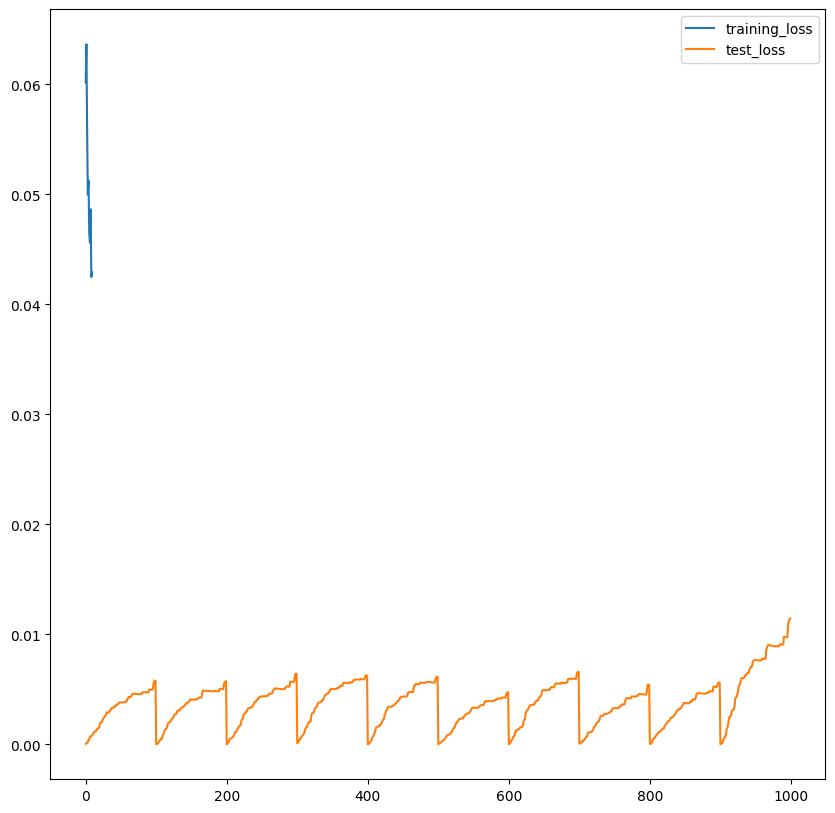

In [ ]:
#testing
f=plt.figure(figsize=(10,10))
plt.plot(train_loss, label="training_loss")
plt.plot(test_loss, label="test_loss")
plt.legend() #legend
plt.show()

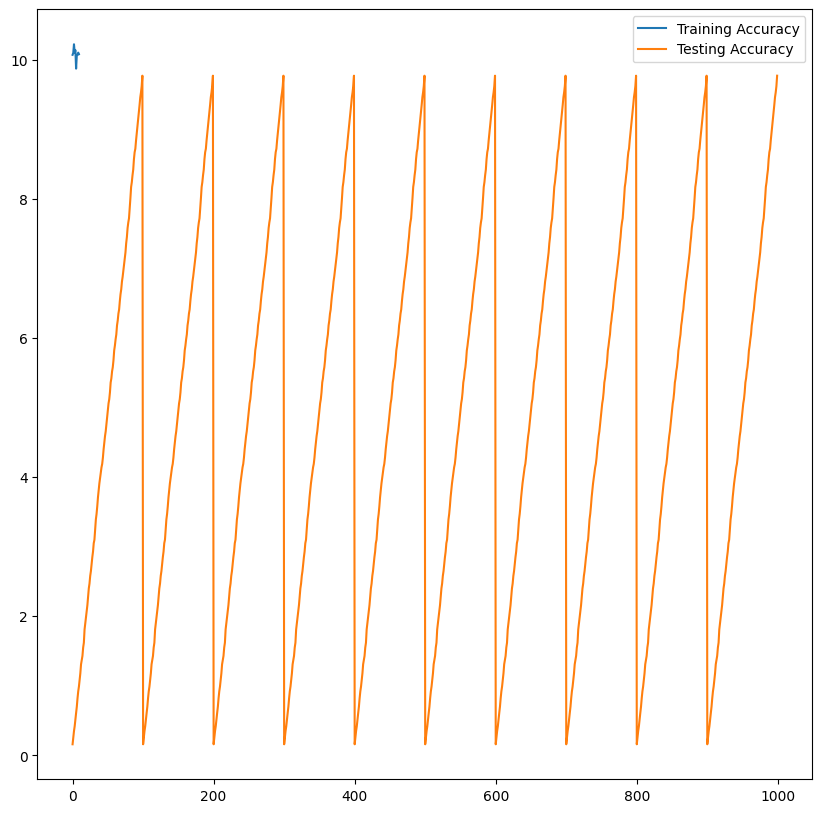

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict(img_name, model):
  image=cv2.imread(img_name, 0) #black and white
  ret, threshold = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
  img=255-threshold
  cv2.imshow('Original',img)
  cv2.waitkey(0)
  cv2.destroyAllWindows()
  img=Image.fromarray(img)
  img=img.transforms_photo(img)
  img=img.view(1,1,28,28)
  img=Variable(img)

  model.eval()

  output=model(img)
  _,predicted=torch.max(output, 1)
  return predicted.item()